##  Author: Furkan Karabulut (fkarabu)
##  Date: 03/27/2024
## Description: 
**In this jupyternotebook, we will be exploring and analyzing datasets related to Porsche and Jaguar sports cars. The main objective is to understand whether the value of these cars is influenced by their age and mileage. We will be loading and merging datasets, performing exploratory data analysis, and creating simple and multiple regression models.**

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [238]:
jaguar = pd.read_csv('jaguar.csv')
porsche = pd.read_csv('porsche.csv')
porsche['brand'] = 'porsche'
jaguar['brand'] = 'jaguar'

print(jaguar.head())
print(porsche.head())

# Combine the two dataframes
combined = pd.concat([jaguar, porsche], ignore_index=True)
combined.head()

combined.tail()


   Unnamed: 0  Price  Age  Mileage   brand
0           1   13.9    5     47.7  jaguar
1           2   19.9    6     44.6  jaguar
2           3   25.9    4     35.3  jaguar
3           4   46.9    2     19.6  jaguar
4           5   12.9    7     71.0  jaguar
   Unnamed: 0  Price  Age  Mileage    brand
0           1   69.4    3     21.5  porsche
1           2   56.9    3     43.0  porsche
2           3   49.9    2     19.9  porsche
3           4   47.4    4     36.0  porsche
4           5   42.9    4     44.0  porsche


,Unnamed: 0,Price,Age,Mileage,brand
55,26,33.9,7,50.4,porsche
56,27,23.9,20,89.6,porsche
57,28,22.9,22,83.4,porsche
58,29,16.0,20,86.0,porsche
59,30,52.9,3,37.4,porsche


/Users/furkankarabulut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


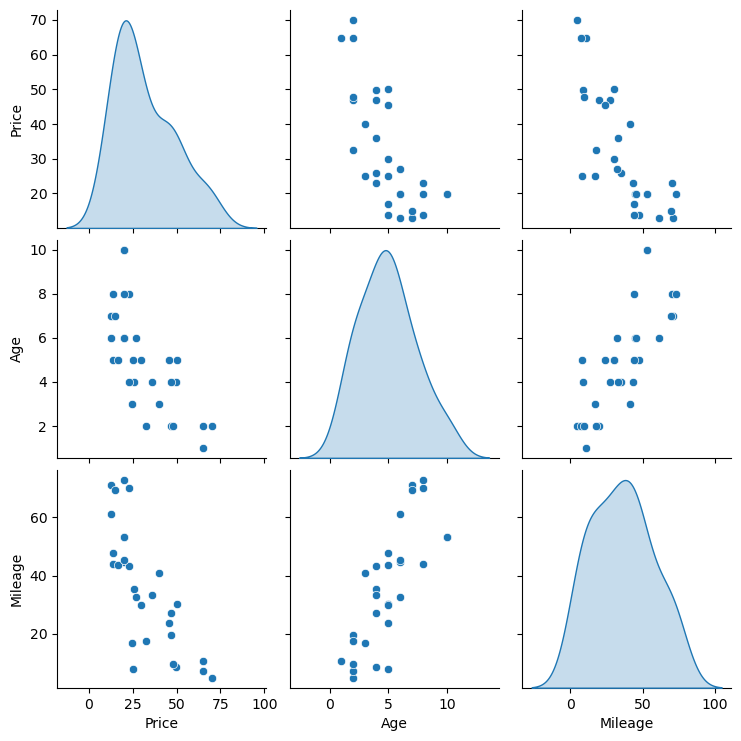

In [239]:
sns.pairplot(data=jaguar, y_vars=['Price', 'Age', 'Mileage'], x_vars=['Price', 'Age', 'Mileage'], diag_kind='kde')

/Users/furkankarabulut/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


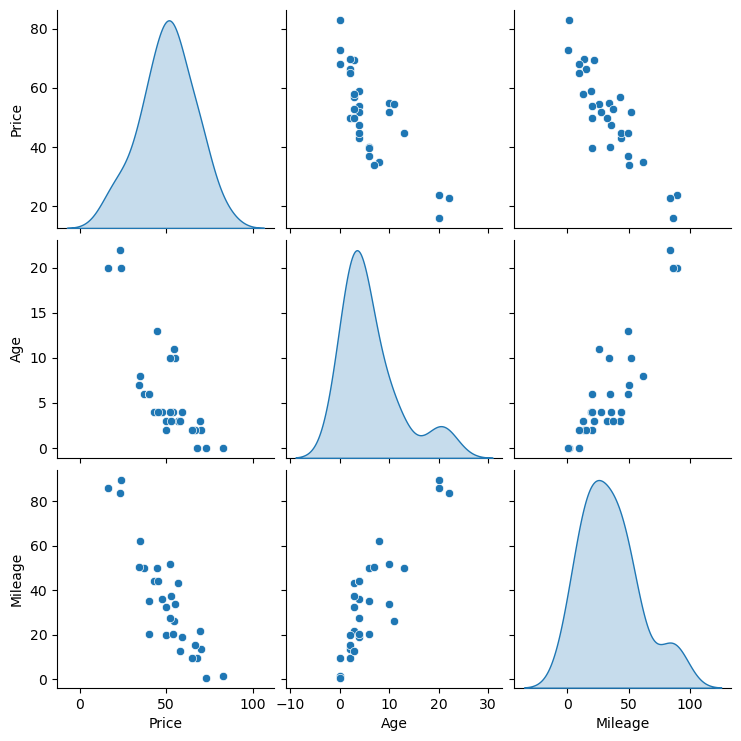

In [240]:
sns.pairplot(data=porsche, y_vars=['Price', 'Age', 'Mileage'], x_vars=['Price', 'Age', 'Mileage'], diag_kind='kde')

In [241]:
jag_price_mil_result = smf.ols('Price ~ Mileage', data=jaguar).fit()
jag_price_age_result = smf.ols('Price ~ Age', data=jaguar).fit()

jag_price_mil_result.params


Intercept    54.227464
Mileage      -0.620299
dtype: float64

In [242]:
jag_price_age_result.params

Intercept    56.988403
Age          -5.039947
dtype: float64

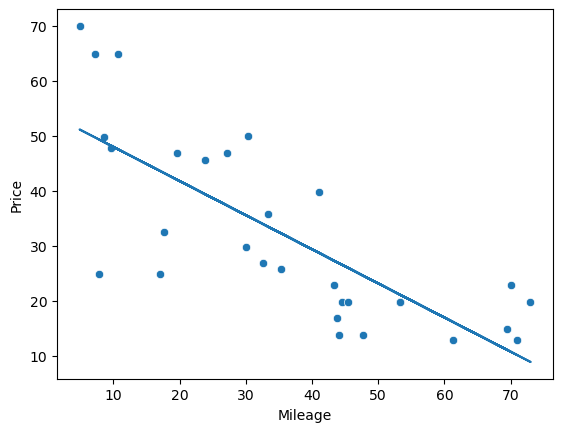

In [243]:
jaguar['mil_line'] = jaguar['Mileage'] * jag_price_mil_result.params[1] + jag_price_mil_result.params[0]
ax = sns.scatterplot(x='Mileage', y='Price', data=jaguar)
ax.plot('Mileage', 'mil_line', data=jaguar ) 

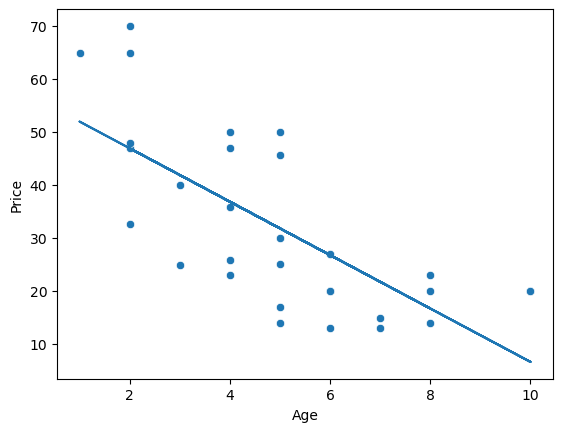

In [244]:
jaguar['age_line'] = jaguar['Age'] * jag_price_age_result.params[1] + jag_price_age_result.params[0]
ax = sns.scatterplot(x='Age', y='Price', data=jaguar)
ax.plot('Age', 'age_line', data=jaguar )

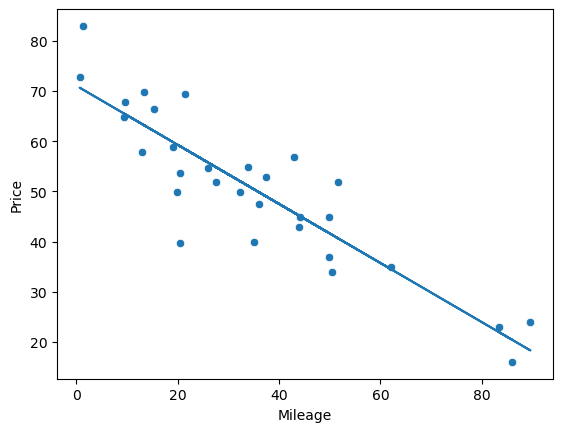

In [245]:
por_price_age_result = smf.ols('Price ~ Age', data=porsche).fit()
por_price_mil_result = smf.ols('Price ~ Mileage', data=porsche).fit()

porsche['mil_line'] = porsche['Mileage'] * por_price_mil_result.params[1] + por_price_mil_result.params[0]
ax = sns.scatterplot(x='Mileage', y='Price', data=porsche)
ax.plot('Mileage', 'mil_line', data=porsche )

In [246]:
por_price_age_result.params


Intercept    63.375037
Age          -2.070705
dtype: float64

In [247]:
por_price_mil_result.params

Intercept    71.090453
Mileage      -0.589401
dtype: float64

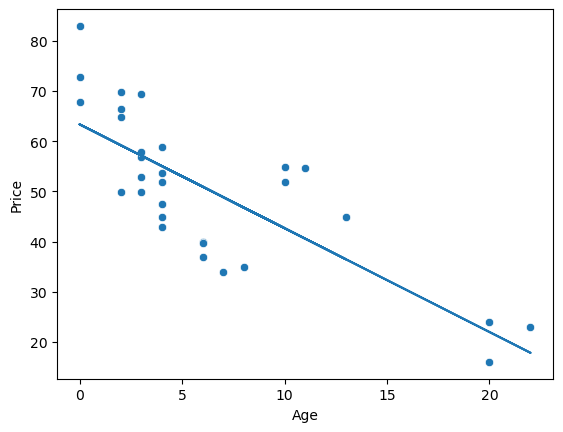

In [248]:
porsche['age_line'] = porsche['Age'] * por_price_age_result.params[1] + por_price_age_result.params[0]
ax = sns.scatterplot(x='Age', y='Price', data=porsche)
ax.plot('Age', 'age_line', data=porsche )

In [249]:
combined_price_mil_result = smf.ols('Price ~ Mileage', data=combined).fit()
combined_price_age_result = smf.ols('Price ~ Age', data=combined).fit()

combined_price_age_result.params

Intercept    53.246022
Age          -2.149138
dtype: float64

In [250]:
combined_price_mil_result.params

Intercept    62.928429
Mileage      -0.612690
dtype: float64

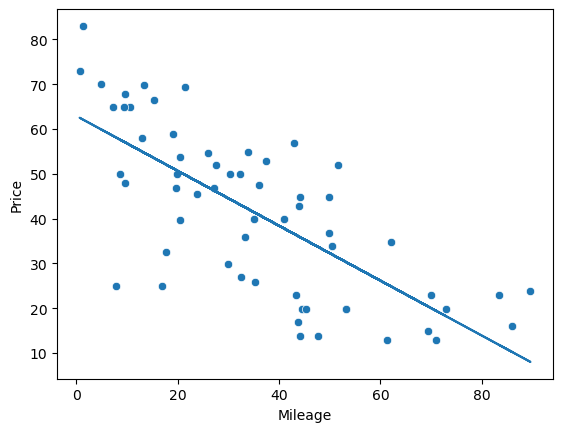

In [251]:
combined['mil_line'] = combined['Mileage'] * combined_price_mil_result.params[1] + combined_price_mil_result.params[0]
ax = sns.scatterplot(x='Mileage', y='Price', data=combined)
ax.plot('Mileage', 'mil_line', data=combined)

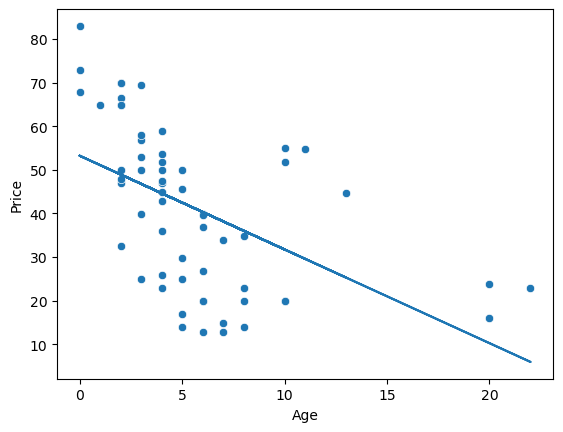

In [252]:
combined['age_line'] = combined['Age'] * combined_price_age_result.params[1] + combined_price_age_result.params[0]
ax = sns.scatterplot(x='Age', y='Price', data=combined)
ax.plot('Age', 'age_line', data=combined)

In [253]:
# Multiple regression for the last question
por_multiple_reg = smf.ols('Price ~ Mileage + Age', data=porsche).fit()
jag_multiple_reg = smf.ols('Price ~ Age + Mileage', data=jaguar).fit()
combined_multiple_reg = smf.ols('Price ~ Age + Mileage', data=combined).fit()



In [254]:
por_multiple_reg.params

Intercept    70.919161
Mileage      -0.561336
Age          -0.130226
dtype: float64

In [255]:
por_price_age_result.params

Intercept    63.375037
Age          -2.070705
dtype: float64

In [256]:
por_price_mil_result.params

Intercept    71.090453
Mileage      -0.589401
dtype: float64

In [257]:
por_multiple_reg.params

Intercept    70.919161
Mileage      -0.561336
Age          -0.130226
dtype: float64

In [258]:
jag_multiple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     22.35
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.88e-06
Time:                        05:44:33   Log-Likelihood:                -112.05
No. Observations:                  30   AIC:                             230.1
Df Residuals:                      27   BIC:                             234.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.8865      4.602     12.580      0.000      48.445      67.328
Age           -2.0442      1.328     -1.539      0.135      -4.770       0.682
Mileage       -0.4394      0.151     -2.904      0.007      -0.750      -0.129
==============================================================================
Omnibus:                        1.450   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.986
Skew:                          -0.072   Prob(JB):                        0.611
Kurtosis:                       2.124   Cond. No.                         99.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
combined_multiple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     32.54
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           3.74e-10
Time:                        05:44:33   Log-Likelihood:                -237.11
No. Observations:                  60   AIC:                             480.2
Df Residuals:                      57   BIC:                             486.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.9497      3.176     19.820      0.000      56.590      69.310
Age            0.5163      0.601      0.859      0.394      -0.687       1.719
Mileage       -0.6947      0.122     -5.682      0.000      -0.940      -0.450
==============================================================================
Omnibus:                        3.095   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.971
Skew:                          -0.527   Prob(JB):                        0.226
Kurtosis:                       2.724   Cond. No.                         80.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

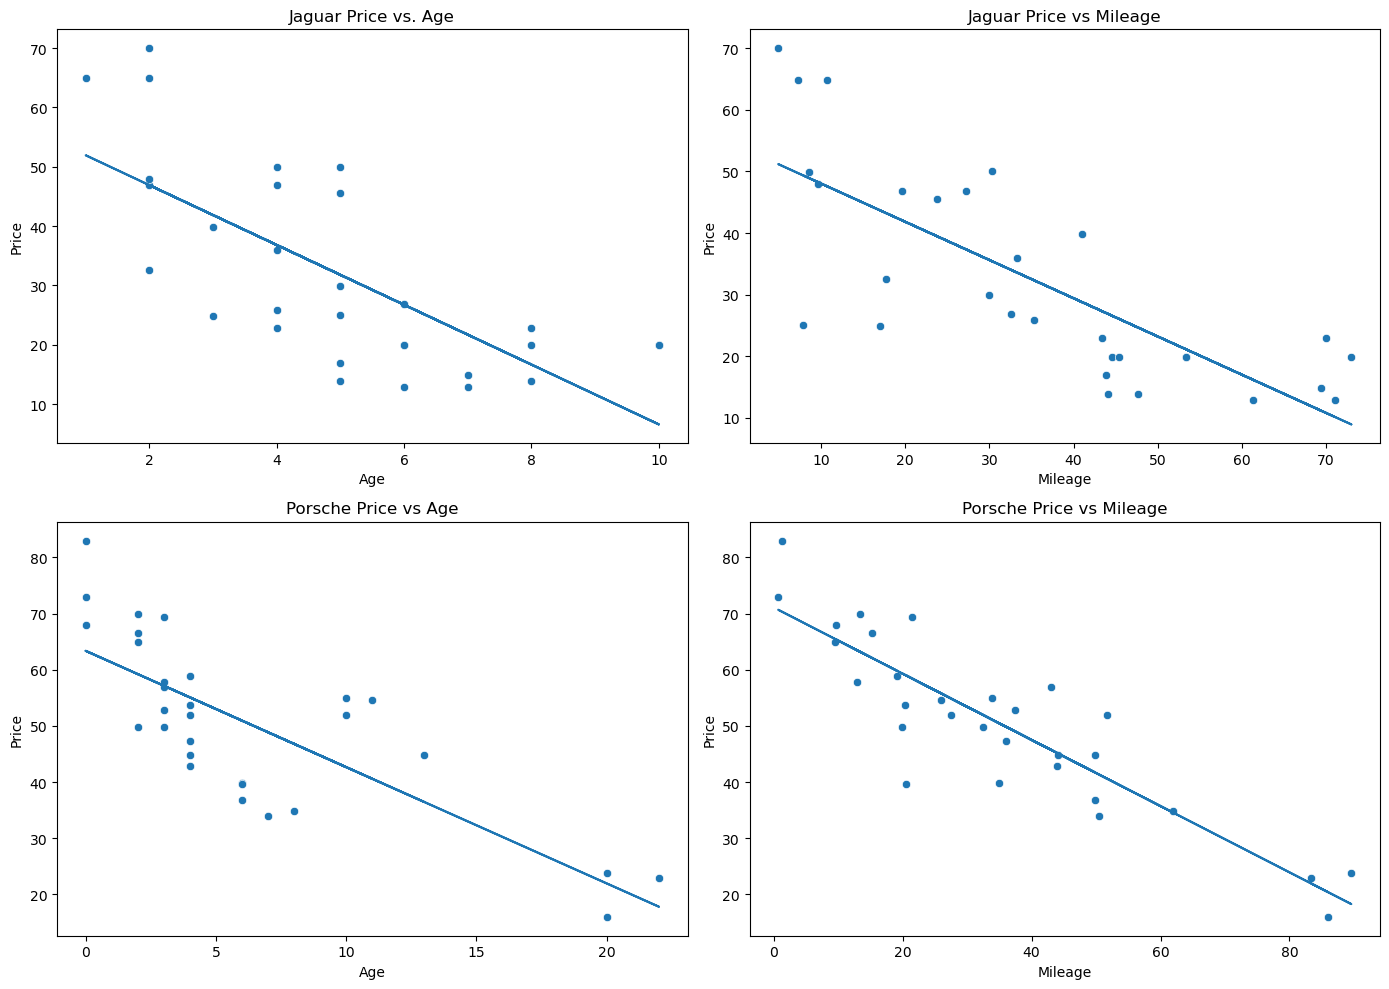

In [260]:
fig, ((jag_age, jag_mil), (por_age, por_mil)) = plt.subplots(2, 2, figsize=(14, 10))

jaguar['age_line'] = jag_price_age_result.params['Intercept'] + jag_price_age_result.params['Age'] * jaguar['Age']
jaguar['mil_line'] = jag_price_mil_result.params['Intercept'] + jag_price_mil_result.params['Mileage'] * jaguar['Mileage']
porsche['age_line'] = por_price_age_result.params['Intercept'] + por_price_age_result.params['Age'] * porsche['Age']
porsche['mil_line'] = por_price_mil_result.params['Intercept'] + por_price_mil_result.params['Mileage'] * porsche['Mileage']

sns.scatterplot(x='Age', y='Price', data=jaguar, ax=jag_age)
jag_age.plot(jaguar['Age'], jaguar['age_line'])
jag_age.set_title('Jaguar Price vs. Age')

sns.scatterplot(x='Mileage', y='Price', data=jaguar, ax=jag_mil)
jag_mil.plot(jaguar['Mileage'], jaguar['mil_line'])
jag_mil.set_title('Jaguar Price vs Mileage')

sns.scatterplot(x='Age', y='Price', data=porsche, ax=por_age)
por_age.plot(porsche['Age'], porsche['age_line'])
por_age.set_title('Porsche Price vs Age')

sns.scatterplot(x='Mileage', y='Price', data=porsche, ax=por_mil)
por_mil.plot(porsche['Mileage'], porsche['mil_line'])
por_mil.set_title('Porsche Price vs Mileage')

fig.tight_layout()

plt.show()


In [236]:
# print(por_price_mil_result.params)
# print(por_price_age_result.params)
# print(jag_price_mil_result.params)
# print(jag_price_age_result.params)
# print(combined_price_mil_result.params)
# print(combined_price_age_result.params)


# por_price_age_result.summary()
# jag_price_age_result.summary()
# combined_multiple_reg.summary()

# por_multiple_reg.params

# for the values of a 10-year-old Porsche, Jaguar, and sports car with 55,000 miles 
# pors_price = por_multiple_reg.params[0] + por_multiple_reg.params[1] * 55 + por_multiple_reg.params[2] * 10

# jag_multiple_reg.params

# jags_price = jag_multiple_reg.params[0] + jag_multiple_reg.params[1] * 10 + jag_multiple_reg.params[2] * 55
# jags_price

combined_multiple_reg.params

combined_price = combined_multiple_reg.params[0] + combined_multiple_reg.params[1] * 10 + combined_multiple_reg.params[2] * 55

combined_price

29.90138310976048

# Question 1:
Is mileage or age (or both) more strongly correlated to the value of a Porsche?  For a Jaguar? For all the data combined? Which is the strongest correlation for each?

# Answer 1:
**Porsche:**

Mileage Coefficient: -0.589401
Age Coefficient: -2.070705

**Jaguar:**

Mileage Coefficient: -0.620299
Age Coefficient: -5.039947

**Combined Data:**

Mileage Coefficient: -0.612690
Age Coefficient: -2.149138

#### Correlation Strength:

For Porsche, age has a stronger correlation with value than mileage, as indicated by the larger absolute value of its coefficient (-2.070705 compared to -0.589401).
For Jaguar, age also shows a stronger correlation with value, with a significantly larger coefficient (-5.039947 compared to -0.620299).
In the combined data, age again shows a stronger correlation with value (-2.149138 compared to -0.612690).

# Question 2:
What is the predictive equation for your best single regression Porsche model? What about your best single regression Jaguar model? What is the predictive equation for your best single or multiple regression model for the collective data? 

# Answer 2:

## Single Regression Models:
### y = Intercept + (m1 × x)

## Multiple Regression Model:
### y = Intercept + (m1 × x1) + (m2 × x2)


**Porsche:**

Price = 63.3750 + (-2.070705 * Age)


**Jaguar:**

Price = 56.9884 + (-5.039947 * Age)

**Combined Data:**

Price = 62.9497 + (0.5163 * Age) + (-0.6127 * Mileage)


# Question 3:
What is the best graphical visualization to represents all your models?  Plot 3-4 models on the same plot or as plots within the same figure. Be sure to title and label your plots appropriately with variable names and units.

# Answer 3:
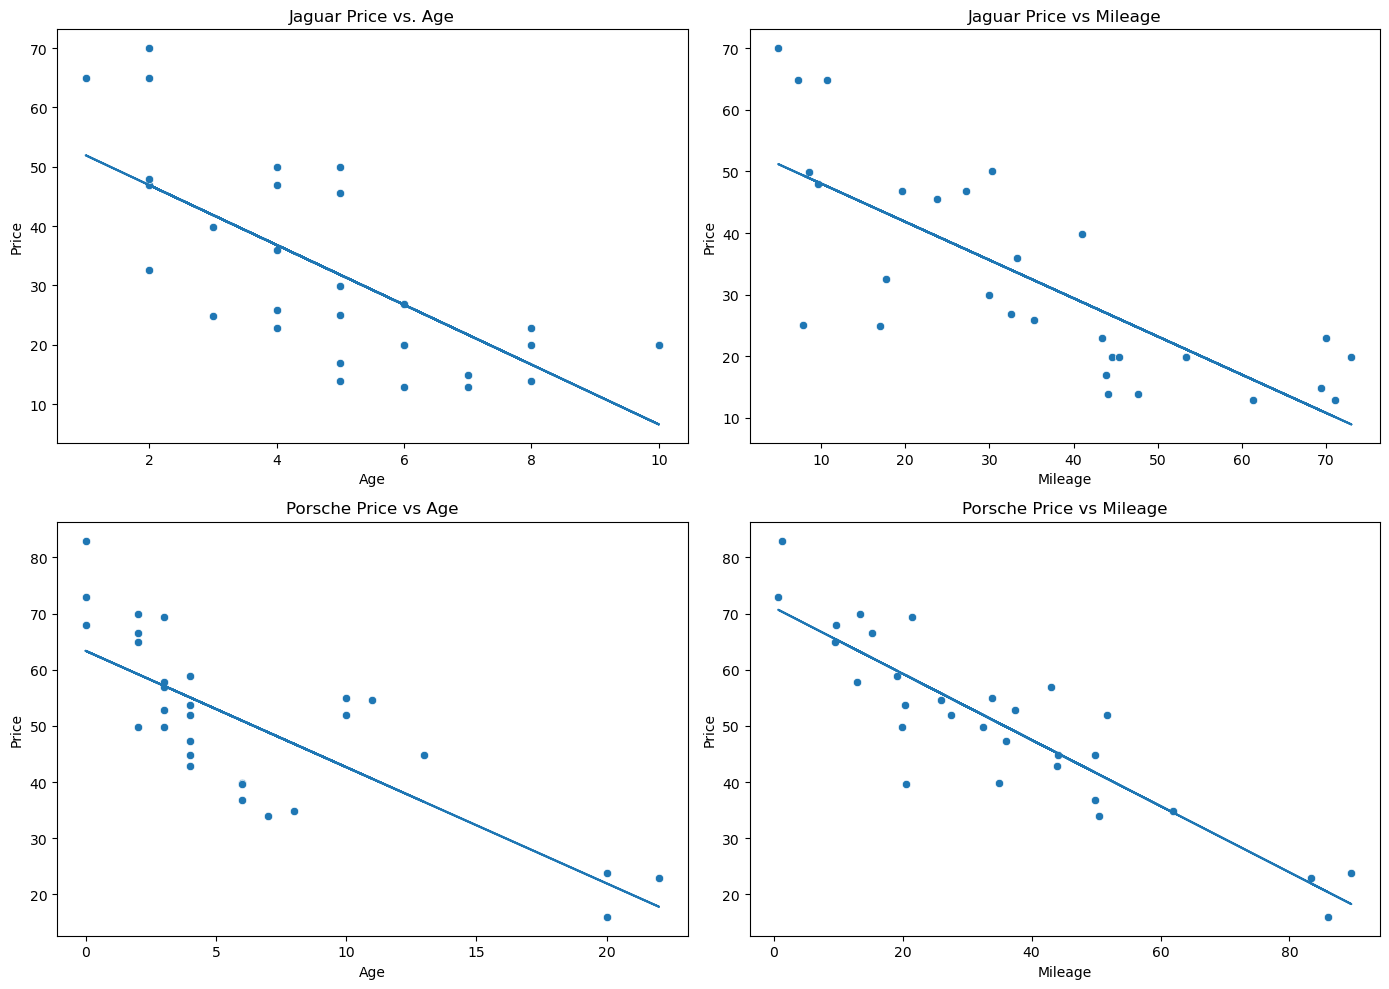


# Question 4:
What is the predicted price for a 10-year-old Porsche with 55,000 miles? For a 10-year-old Jaguar with 50,000 miles? For a 10-year-old car with 50,000 miles in general?


# Answer 4:
**Predicted Price for a 10-year-old Porsche with 50,000 miles:**

```
price = por_multiple_reg.params[0] + por_multiple_reg.params[1] * 55 
        + por_multiple_reg.params[2] * 10

price = $38.74342546652588
```

**Predicted Price for a 10-year-old Porsche with 50,000 miles:**

```
price = jag_multiple_reg.params[0] + por_multiple_reg.params[1] * 10 
        + por_multiple_reg.params[2] * 55

price = $13.27592870946367
```

**Predicted Price for a 10-year-old car with 50,000 miles in general:**

```
price = comb_multiple_reg.params[0] + comb_multiple_reg.params[1] * 10 
        + comb_multiple_reg.params[2] * 55

price = $29.90138310976048
```
